In [8]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Improving Diversified Pricing Strategy with Machine Learning

## Context

[to be populated]

## Objective

[to be populated]

## Data Description

* claim_ID: claim identification code
*

## Importing Libraries

In [5]:
## Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Settings


In [6]:
pd.set_option("display.float_format", lambda x: "%.3f" % x)

## Load the dataset

In [9]:
data = pd.read_csv("/content/drive/MyDrive/IP 2024/Client Data/data.csv")

## Data Overview
* Observations
* Sanity checks

In [9]:
# View shape of data
data.shape

(20065, 12)

In [8]:
# View first 5 rows
data.head()

,Unnamed: 0,property_type,claim_id,claim_amount,property_value,pml,deductible,claim_status,payment,incident_date,payment_date,incident_type
0,1,house,723949d8,196740.0,528000.0,106000.0,5000.0,settled,191740,2007-07-02,2007-09-30,water damage
1,2,house,90d02e95,187650.0,533000.0,107000.0,1000.0,open,20000,2011-04-03,2011-07-02,theft
2,3,house,344c54d1,206580.0,366000.0,73000.0,2000.0,settled,204580,2019-01-12,2019-04-12,nat cat
3,4,house,b3968015,201550.0,234000.0,47000.0,5000.0,under investigation,0,2005-08-17,NaN,nat cat
4,5,house,b0e31207,205740.0,411000.0,82000.0,500.0,settled,205240,2023-05-21,2023-08-19,fire


In [10]:
# View lst 5 rows
data.tail()

,Unnamed: 0,property_type,claim_id,claim_amount,property_value,pml,deductible,claim_status,payment,incident_date,payment_date,incident_type
20060,20061,light sport aircraft,0a5ff71d,2188000.0,2188000.0,2188000.0,109000.0,settled,2079000,2022-11-26,2023-02-24,nat cat
20061,20062,light sport aircraft,2659e82f,3435500.0,3436000.0,3436000.0,172000.0,settled,3263500,2022-09-13,2022-12-12,collision
20062,20063,light sport aircraft,fd91e632,2788000.0,2788000.0,2788000.0,139000.0,settled,2649000,2021-06-18,2021-09-16,nat cat
20063,20064,light sport aircraft,520e9d3f,2188000.0,2188000.0,2188000.0,109000.0,under investigation,0,2021-04-14,NaN,collision
20064,20065,light sport aircraft,5558b0fb,3907000.0,3907000.0,3907000.0,195000.0,under investigation,0,2021-07-01,NaN,collision


In [11]:
# View random sample of size 10
data.sample(10)

,Unnamed: 0,property_type,claim_id,claim_amount,property_value,pml,deductible,claim_status,payment,incident_date,payment_date,incident_type
10774,10775,house,fdddeb72,187070.0,618000.0,124000.0,2000.0,settled,185070,2007-09-26,2007-12-25,water damage
13415,13416,house,4d51430a,214650.0,384000.0,77000.0,5000.0,settled,209650,2021-10-27,2022-01-25,water damage
17623,17624,department store,c0ce64d5,356200.0,564000.0,113000.0,2000.0,settled,354200,2020-08-18,2020-11-16,water damage
8681,8682,house,bc815d51,187910.0,512000.0,102000.0,2000.0,settled,185910,2014-07-24,2014-10-22,fire
3553,3554,house,5c2c0a83,169670.0,572000.0,114000.0,500.0,settled,169170,2017-10-22,2018-01-20,water damage
7276,7277,house,730b1c60,217060.0,306000.0,61000.0,500.0,under investigation,0,2006-11-26,NaN,water damage
7380,7381,house,717a26aa,211770.0,569000.0,114000.0,2000.0,settled,209770,2023-06-15,2023-09-13,fire
150,151,house,dbf64dd8,221890.0,670000.0,134000.0,2000.0,settled,219890,2023-03-25,2023-06-23,water damage
4867,4868,house,ca6bfee4,208380.0,337000.0,67000.0,2000.0,settled,206380,2016-02-05,2016-05-05,nat cat
6006,6007,house,d75545a9,195710.0,575000.0,115000.0,2000.0,denied,0,2004-02-26,NaN,nat cat


In [12]:
# View data types, no. of non-null features, and size of dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20065 entries, 0 to 20064
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      20065 non-null  int64  
 1   property_type   20065 non-null  object 
 2   claim_id        20065 non-null  object 
 3   claim_amount    20065 non-null  float64
 4   property_value  20065 non-null  float64
 5   pml             20065 non-null  float64
 6   deductible      20065 non-null  float64
 7   claim_status    20065 non-null  object 
 8   payment         20065 non-null  int64  
 9   incident_date   20065 non-null  object 
 10  payment_date    16002 non-null  object 
 11  incident_type   20065 non-null  object 
dtypes: float64(4), int64(2), object(6)
memory usage: 1.8+ MB


* There are 12 features
* Except for 'payment', all features are populated
* Size is 1.8MB

In [10]:
# Confirm competeness of data
pd.DataFrame(data= {'% of Missing Values':round(data.isna().sum() / data.isna().count() * 100, 2)}).sort_values(by= '% of Missing Values', ascending=False)

,% of Missing Values
payment_date,20.250
Unnamed: 0,0.000
property_type,0.000
claim_id,0.000
claim_amount,0.000
property_value,0.000
pml,0.000
deductible,0.000
claim_status,0.000
payment,0.000


## Univariate Analysis

In [1]:
# Function for plotting a combination of boxplot and a histogram
def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,
        sharex=True,
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color= "violet"
    )
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette= "winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )

### Insight and Analysis of Numerical Features

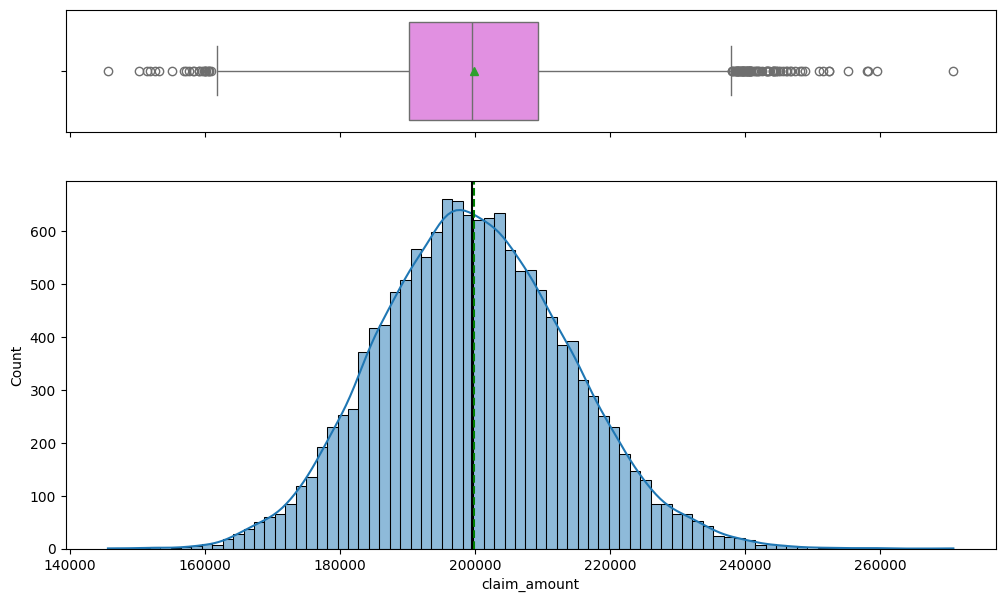

In [14]:
# Feature: 'claim_amount'
histogram_boxplot(data = data[data.property_type == 'house'], feature = 'claim_amount', kde = True)

### Insight & Analyisis on Categorical Variables

1.   List item
2.   List item



In [15]:
# Function to create barplots (suitable for visualizing the distribution of categorical variables)

def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=10)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )
        else:
            label = p.get_height()

        x = p.get_x() + p.get_width() / 2
        y = p.get_height()

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )

    plt.show()

<ipython-input-15-91ec081fded6>:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(


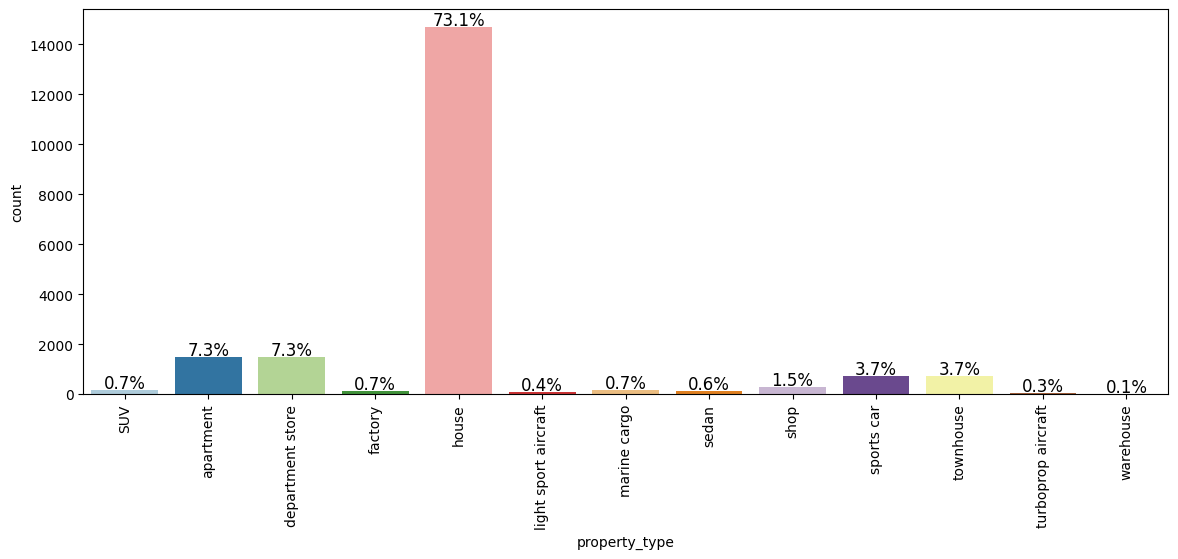

In [17]:
labeled_barplot(data = data, feature = 'property_type', perc = True)

In [18]:
# Functions for

def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
        stat="density",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
        stat="density",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()

def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 5, 5))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

incident_type         collision  fire  nat cat  other  theft  water damage  \
property_type                                                                
All                         908  6859     3543   1691   2005          5059   
sports car                  578     0       41     42     73             0   
SUV                         103     0       19      6     19             0   
sedan                        87     0       13     11      6             0   
light sport aircraft         61     0        8      4      0             0   
turboprop aircraft           48     0        4      2      5             0   
marine cargo                 31     0       24     76     16             0   
apartment                     0   517      286    123    144           398   
department store              0   635      276      0    154           403   
factory                       0    72       24      0      0            36   
house                         0  5277     2635   1340   1492    

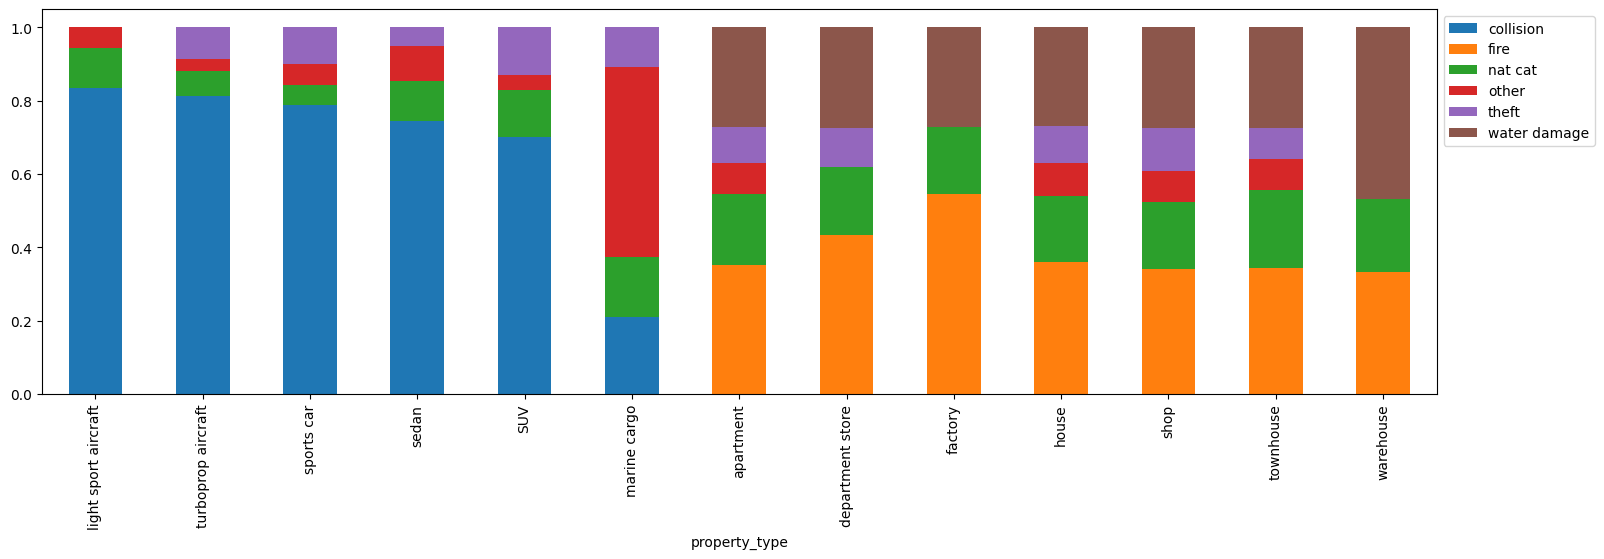

In [21]:
stacked_barplot(data, 'property_type', 'incident_type')

<ipython-input-25-0fb8072fb740>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data = data, x = data['property_type'], y = data['claim_amount'], palette= "Dark2")


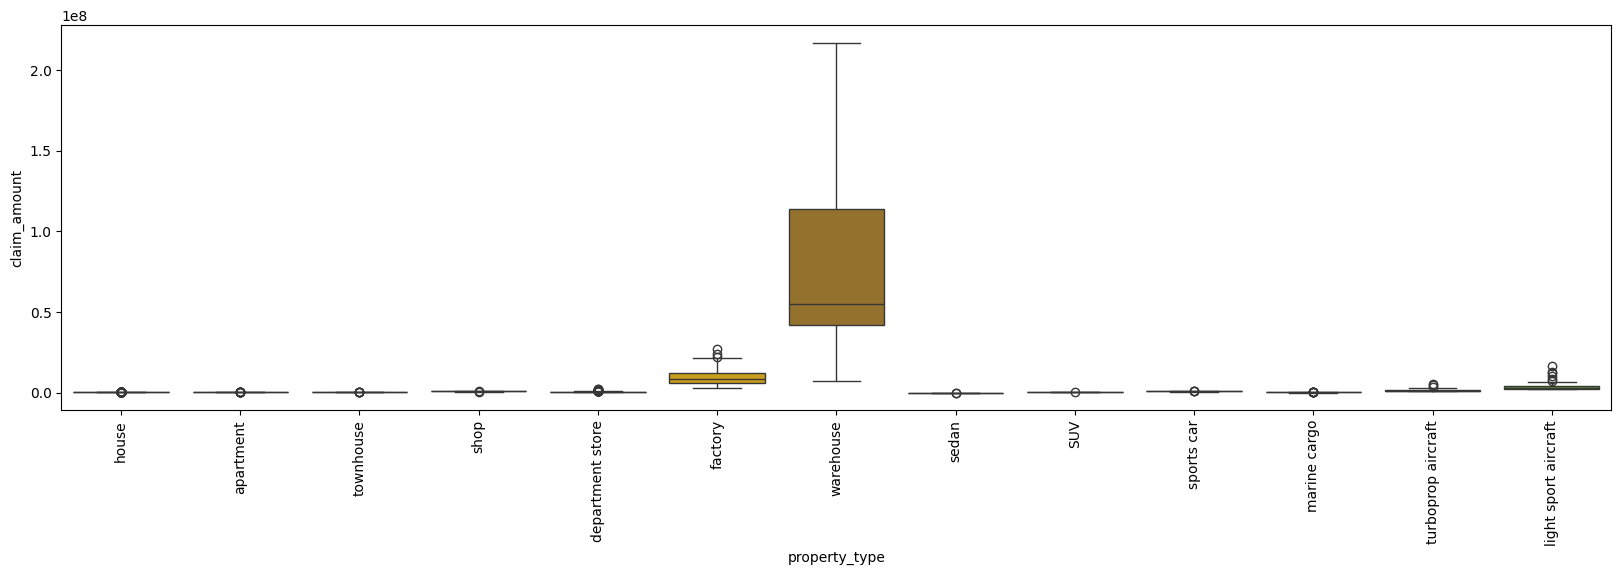

,count,mean,std,min,25%,50%,75%,95%,99%,max
property_type,,,,,,,,,,
SUV,147.000,301183.197,21128.638,244750.000,288605.000,299960.000,314440.000,336265.000,347558.200,351360.000
apartment,1468.000,149750.763,12134.358,111410.000,141457.500,149345.000,157710.000,170115.500,179059.500,202950.000
department store,1468.000,500180.654,265832.422,91500.000,315575.000,443350.000,607000.000,1011665.000,1402476.000,2208900.000
factory,132.000,9858544.697,4767890.235,2889100.000,6131125.000,8721250.000,12395000.000,19567010.000,23292179.000,27279000.000
house,14677.000,199863.311,14113.726,145590.000,190150.000,199460.000,209260.000,223524.000,234389.600,270810.000
light sport aircraft,73.000,3778089.041,2669490.158,2005500.000,2243500.000,2634500.000,4228000.000,9118100.000,13770600.000,16359000.000
marine cargo,147.000,180110.204,104887.229,25900.000,105650.000,154700.000,219800.000,399740.000,539188.000,592400.000
sedan,117.000,49960.598,5013.331,39100.000,46050.000,49690.000,53150.000,58096.000,63349.600,64470.000
shop,294.000,746903.810,31543.302,642140.000,723390.000,748285.000,767712.500,799681.000,811323.700,835880.000


In [25]:
plt.figure(figsize=(20, 5))
sns.boxplot(data = data, x = data['property_type'], y = data['claim_amount'], palette= "Dark2")
plt.xticks(rotation=90, fontsize=10)
plt.show()

data.groupby(['property_type'])['claim_amount'].describe(percentiles = [0.25, 0.50, 0.75, 0.95, 0.99])